In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import xarray as xr
import os
import calendar
import string
%matplotlib inline

In [2]:
# figure root
fig_root = os.environ['HOME']+'/work/cmip6/E3SM'
save_fig = True

In [3]:
# set esgf
esgf_root = '/Volumes/LaCie/data/cmip6/esgf/sst'
# list of models
sourceid_list = [
                'BCC-CSM2-MR',
                'CESM2',
                'CESM2-WACCM',
                'CNRM-CM6-1',
                'CNRM-CM6-1-HR',
                'CNRM-ESM2-1',
                'CanESM5',
                'CanESM5-CanOE',
                'HadGEM3-GC31-LL',
                'INM-CM4-8',
                'INM-CM5-0',
                'IPSL-CM6A-LR',
                'MCM-UA-1-0',
                'MPI-ESM1-2-HR',
                'MPI-ESM1-2-LR',
                'MRI-ESM2-0',
                'NorESM2-LM',
                'NorESM2-MM',
                'UKESM1-0-LL',
                ]
# list of variant
# “r” for realization, “i” for initialization, “p” for physics, and “f” for forcing
variantlb_list = [
                 'r1i1p1f1',
                 'r1i1p1f1',
                 'r1i1p1f1',
                 'r1i1p1f2',
                 'r1i1p1f2',
                 'r1i1p1f2',
                 'r17i1p2f1',
                 'r1i1p1f1',
                 'r1i1p1f3',
                 'r1i1p1f1',
                 'r1i1p1f1',
                 'r1i1p1f1',
                 'r1i1p1f2',
                 'r1i1p1f1',
                 'r1i1p1f1',
                 'r1i1p1f1',
                 'r1i1p1f1',
                 'r1i1p1f1',
                 'r1i1p1f2',
                 ]
# list of variables
var_list = ['tosga']
# model component
realm = 'O'
# output frequency
freq = 'mon'
# scenario
expid = 'ssp585'


In [4]:
# load esgf data
nsource = len(sourceid_list)
nvariant = len(variantlb_list)
assert nsource == nvariant, 'Variant label ({:d}) list is not compatible with source id list ({:d}).'.format(nvariant, nsource)
nvar = len(var_list)
f_init = False
for i in np.arange(nsource):
    for j in np.arange(nvar):
        infile_prefix = var_list[j]+'_'+realm+freq+'_'+sourceid_list[i]+'_'+expid+'_'+variantlb_list[i]
        print(infile_prefix)
        infile_list = [esgf_root+'/'+filename \
                       for filename in os.listdir(esgf_root) if filename.startswith(infile_prefix)]
        ninfile = len(infile_list)
        if ninfile > 0:
            print('Opening {:d} files...'.format(len(infile_list)))
            dset = xr.open_mfdataset(infile_list, combine='by_coords')
            if not f_init:
                esgf_time = dset.time
                esgf_ntime = esgf_time.size
                esgf_data = np.zeros([nvar, nsource, esgf_ntime])
                f_init = True
            esgf_data[j,i,:] = dset.variables[var_list[j]][:].squeeze()
        else:
            print('File with prefix \'{:s}\' not found. Skipping.'.format(infile_prefix))
            esgf_data[j,i,:] = np.nan

tosga_Omon_BCC-CSM2-MR_ssp585_r1i1p1f1
Opening 1 files...
tosga_Omon_CESM2_ssp585_r1i1p1f1
Opening 2 files...
tosga_Omon_CESM2-WACCM_ssp585_r1i1p1f1
Opening 1 files...


/Users/qingli/miniconda3/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'tosga' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/qingli/miniconda3/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'tosga' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


tosga_Omon_CNRM-CM6-1_ssp585_r1i1p1f2
Opening 1 files...
tosga_Omon_CNRM-CM6-1-HR_ssp585_r1i1p1f2
Opening 1 files...
tosga_Omon_CNRM-ESM2-1_ssp585_r1i1p1f2
Opening 1 files...
tosga_Omon_CanESM5_ssp585_r17i1p2f1
Opening 1 files...
tosga_Omon_CanESM5-CanOE_ssp585_r1i1p1f1
File with prefix 'tosga_Omon_CanESM5-CanOE_ssp585_r1i1p1f1' not found. Skipping.
tosga_Omon_HadGEM3-GC31-LL_ssp585_r1i1p1f3
Opening 2 files...
tosga_Omon_INM-CM4-8_ssp585_r1i1p1f1
Opening 1 files...
tosga_Omon_INM-CM5-0_ssp585_r1i1p1f1
Opening 1 files...
tosga_Omon_IPSL-CM6A-LR_ssp585_r1i1p1f1
Opening 1 files...
tosga_Omon_MCM-UA-1-0_ssp585_r1i1p1f2
Opening 1 files...
tosga_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1
Opening 18 files...
tosga_Omon_MPI-ESM1-2-LR_ssp585_r1i1p1f1
Opening 5 files...
tosga_Omon_MRI-ESM2-0_ssp585_r1i1p1f1
Opening 1 files...
tosga_Omon_NorESM2-LM_ssp585_r1i1p1f1
Opening 9 files...
tosga_Omon_NorESM2-MM_ssp585_r1i1p1f1
Opening 9 files...
tosga_Omon_UKESM1-0-LL_ssp585_r1i1p1f2
Opening 2 files...


In [5]:
# set e3sm
e3sm_root = '/Volumes/LaCie/data/cmip6/e3sm'
e3smcase_list = [
                '20190807.DECKv1b_P1_SSP5-8.5.ne30_oEC.cori-knl',
                '20190821.DECKv1b_P2_SSP5-8.5.ne30_oEC.cori-knl',
                '20190821.DECKv1b_P3_SSP5-8.5.ne30_oEC.cori-knl',
                ]
var_list = ['timeMonthly_avg_avgValueWithinOceanRegion_avgSurfaceTemperature']
file_list = ['mpasTimeSeriesOcean.nc']
            

In [6]:
# load e3sm data
ne3smcase = len(e3smcase_list)
f_init = False
for i in np.arange(ne3smcase):
    for j in np.arange(nvar):
        infile = e3sm_root+'/mpas_analysis/'+e3smcase_list[i]+'/timeseries/'+file_list[j]
        print('Opening file {:}...'.format(infile))
        dset = xr.open_dataset(infile)
        if not f_init:
            e3sm_time = dset.Time
            e3sm_ntime = e3sm_time.size
            e3sm_data = np.zeros([nvar, ne3smcase, e3sm_ntime])
            f_init = True
        ntime = dset.Time.size
        e3sm_data[j,i,0:ntime] = dset.variables[var_list[j]][0:,-1]
        if ntime < e3sm_ntime:
            e3sm_data[j,i,ntime:] = np.nan

Opening file /Volumes/LaCie/data/cmip6/e3sm/mpas_analysis/20190807.DECKv1b_P1_SSP5-8.5.ne30_oEC.cori-knl/timeseries/mpasTimeSeriesOcean.nc...
Opening file /Volumes/LaCie/data/cmip6/e3sm/mpas_analysis/20190821.DECKv1b_P2_SSP5-8.5.ne30_oEC.cori-knl/timeseries/mpasTimeSeriesOcean.nc...
Opening file /Volumes/LaCie/data/cmip6/e3sm/mpas_analysis/20190821.DECKv1b_P3_SSP5-8.5.ne30_oEC.cori-knl/timeseries/mpasTimeSeriesOcean.nc...


In [7]:
# monthly to annually
time = np.linspace(2015,2100,86)
ntime = len(time)
esgf_data_ann = np.zeros([nvar, nsource, ntime])
e3sm_data_ann = np.zeros([nvar, ne3smcase, ntime])
for i in np.arange(ntime):
    esgf_data_ann[:,:,i] = np.mean(esgf_data[:,:,i*12:(i+1)*12], axis=2)
    e3sm_data_ann[:,:,i] = np.mean(e3sm_data[:,:,i*12:(i+1)*12], axis=2)
    

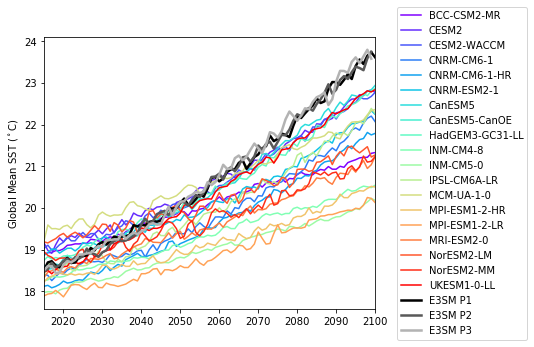

In [8]:
cmap = cm.get_cmap('rainbow')
ifrac = np.linspace(0,1,nsource)
cmap2 = cm.get_cmap('gray')
ifrac2 = np.linspace(0,0.7,ne3smcase)

fig = plt.figure(figsize=(8, 5))
ax = plt.gca()
ivar = 0
for k in np.arange(nsource):
    plt.plot(time, esgf_data_ann[ivar,k,:], \
            color=cmap(ifrac[k]), \
            label=sourceid_list[k])
ax.set_ylabel('Global Mean SST ($^\circ$C)')
for k in np.arange(ne3smcase):
    ax.plot(time, e3sm_data_ann[ivar,k,:], \
            color=cmap2(ifrac2[k]), linewidth=2.5, label='E3SM P{:d}'.format(k+1))
ax.set_xlim([time[0], time[-1]])
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))

# save figure
if save_fig:
    plt.subplots_adjust(right=0.7)
    figname = fig_root+'/CMIP6_ScenarioMIP_SST.png'
    fig.savefig(figname, dpi = 300)